In [161]:
import pandas as pd
import matplotlib as plt
import numpy as np


In [162]:
df = pd.read_csv('netflix_titles.csv')
imdb = pd.read_csv('imdb_top_1000.csv')

In [163]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [165]:
#count how many NaN values per column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [166]:
# Count unique values per column
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [167]:
#Create a column for duration of movies, the column starts with all values as NaN and will populate those where the show_type == Movie
#We do it in case we want to plot length of movies
df['movie_duration'] = np.nan  # Initialize the new column with NaN

for index, row in df.iterrows():
    if row['type'] == 'Movie':
        try:
            df.at[index, 'movie_duration'] = int(row['duration'].split()[0])
        except Exception as e:
            print(f"Error processing movie at index {index}: {e}") # print an error message if type== Movie but cant find duration



Error processing movie at index 5541: 'float' object has no attribute 'split'
Error processing movie at index 5794: 'float' object has no attribute 'split'
Error processing movie at index 5813: 'float' object has no attribute 'split'


In [168]:
# Repeat same process for series, so we know how many seasons
#We do it in case we want to plot number of seasons
df['number_of_seasons'] = np.nan  # Initialize the new column with NaN

for index, row in df.iterrows():
    if row['type'] == 'TV Show':
        try:
            df.at[index, 'number_of_seasons'] = int(row['duration'].split()[0])
        except Exception as e:
            print(f"Error processing TV Show at index {index}: {e}")


In [169]:
#R Check to ensure the above code worked and we have some data in our new columns
df.notnull().sum()

show_id              8807
type                 8807
title                8807
director             6173
cast                 7982
country              7976
date_added           8797
release_year         8807
rating               8803
duration             8804
listed_in            8807
description          8807
movie_duration       6128
number_of_seasons    2676
dtype: int64

In [170]:
#again, checing new columns
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,number_of_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0


In [171]:
#Identifying unique values in our new columns
df.nunique()

show_id              8807
type                    2
title                8807
director             4528
cast                 7692
country               748
date_added           1767
release_year           74
rating                 17
duration              220
listed_in             514
description          8775
movie_duration        205
number_of_seasons      15
dtype: int64

In [172]:
# Convert date_added column to datetime object
# Errors=coerce handle errors and replace NaN with NaT (Not a Time)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].fillna(pd.NaT, inplace=True)

In [173]:
# Adding columns with the date, month and year the title was added, so we can plot when do netflix prefers to release titles (if we want)

df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [174]:
# Create a new column with the 1st genre of the movie/serie in case we want to plot genre vs whatever
df['first_listed'] = df['listed_in'].str.split(',').str[0].str.strip()

In [175]:
#Checking the code worked
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,number_of_seasons,day_added,year_added,month_added,first_listed
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,25.0,2021.0,9.0,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,24.0,2021.0,9.0,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,24.0,2021.0,9.0,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0,24.0,2021.0,9.0,Docuseries
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,24.0,2021.0,9.0,International TV Shows


In [176]:
# checking column types one last time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           6173 non-null   object        
 4   cast               7982 non-null   object        
 5   country            7976 non-null   object        
 6   date_added         8797 non-null   datetime64[ns]
 7   release_year       8807 non-null   int64         
 8   rating             8803 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  movie_duration     6128 non-null   float64       
 13  number_of_seasons  2676 non-null   float64       
 14  day_adde

In [177]:
# Change the month column for the actual month (currently it is  anumber)
month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df = df.replace({'month_added':month_dict})

# Some plots now

<AxesSubplot:title={'center':'Percentage of movies and series'}, ylabel='type'>

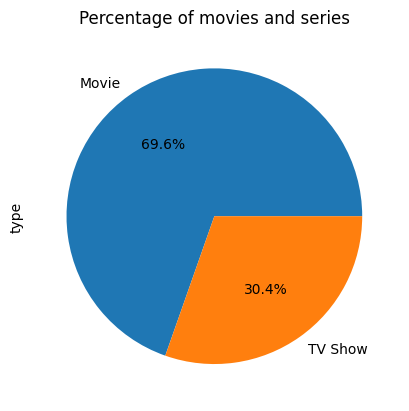

In [178]:
# Whats the share between movies and TV Shows
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title = 'Percentage of movies and series')

<AxesSubplot:title={'center':'Number of releases per year'}>

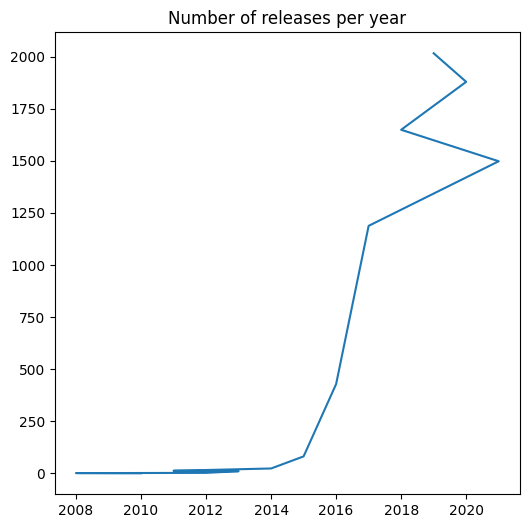

In [179]:
# Number of releases per year (including movies and TV shows)
df['year_added'].value_counts().plot(figsize=(6,6), title = 'Number of releases per year')

In [180]:
# Create different df for movies and series
movies = df[df['type'] == 'Movie']
series = df[df['type'] == 'TV Show']



# Number of movies and series added per year

<AxesSubplot:title={'center':'number of movies relased per year'}>

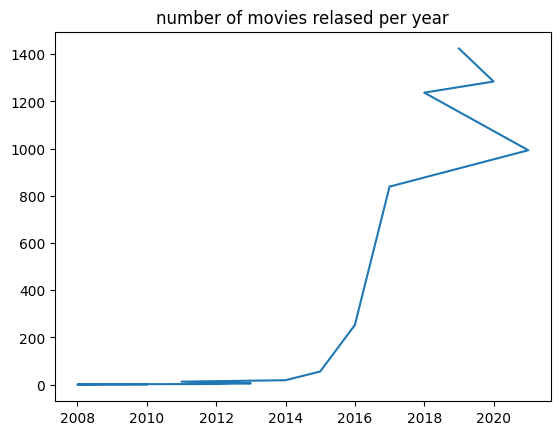

In [181]:
movies['year_added'].value_counts().plot(title = 'number of movies relased per year')
# I dont know how to add those 2 in one same plot!!! something isnt working!

<AxesSubplot:title={'center':'number of series relased per year'}>

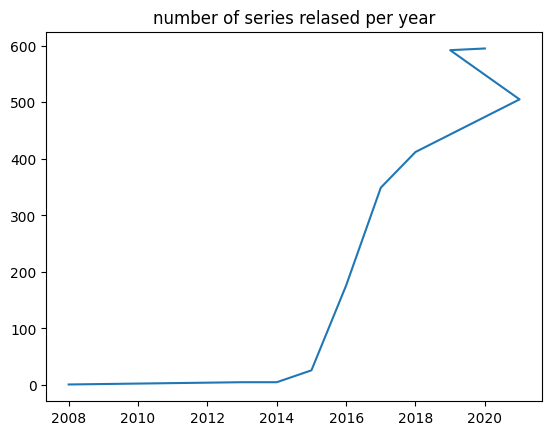

In [182]:
series['year_added'].value_counts().plot(title = 'number of series relased per year')

<AxesSubplot:title={'center':'Most common genre'}>

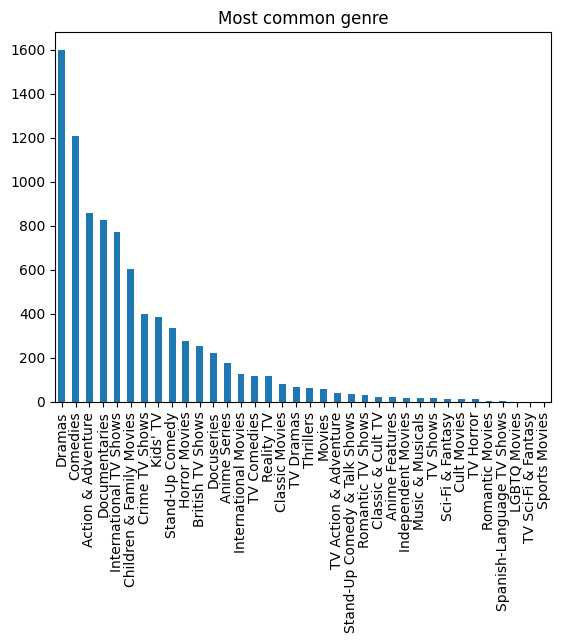

In [183]:
# Most common genre (based on the 1st genre lsited on the description)(includes movies and series)
df['first_listed'].value_counts().plot(kind="bar", title="Most common genre")

<AxesSubplot:title={'center':'Most common rating'}>

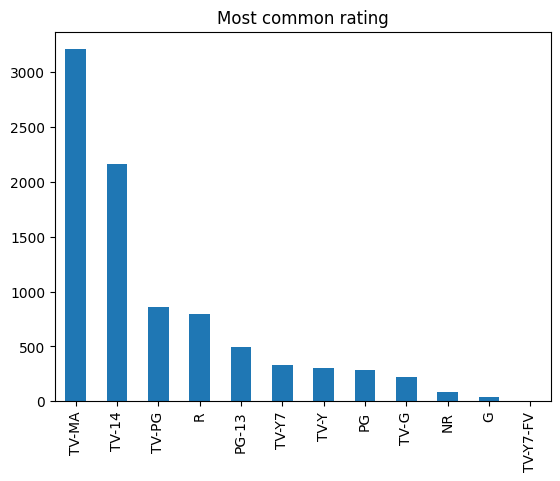

In [184]:
df['rating'].value_counts().head(12).plot(kind="bar", title="Most common rating")

<AxesSubplot:title={'center':'Number of seasons'}, ylabel='number_of_seasons'>

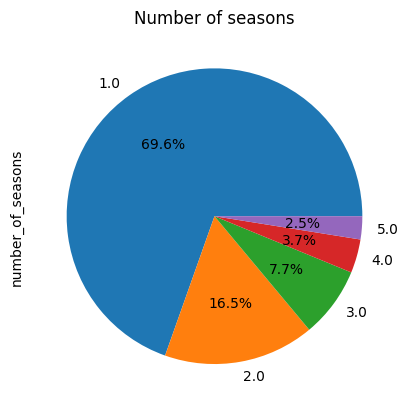

In [185]:
# number of seasons on series (only showing up to 5 seasons using .head)
series['number_of_seasons'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', title = 'Number of seasons')

In [186]:
movies['movie_duration'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: movie_duration, dtype: float64

/kas/kloud/notebook/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


AttributeError: module 'matplotlib' has no attribute 'show'

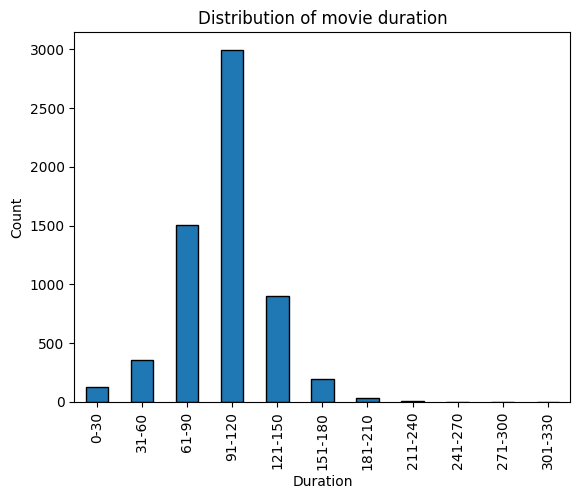

In [187]:


bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330']


movies['binned'] = pd.cut(movies['movie_duration'], bins=bins, labels=labels)

# Count the occurrences in each group
counts = movies['binned'].value_counts(sort=False)


ax = counts.plot(kind='bar', edgecolor='black')


ax.set(xlabel='Duration', ylabel='Count', title='Distribution of movie duration')

# Show the plot
plt.show()


<AxesSubplot:>

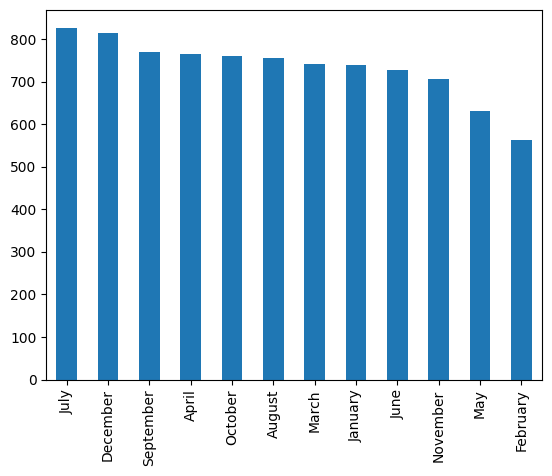

In [188]:
# monthly releases
df['month_added'].value_counts().plot(kind='bar')

<AxesSubplot:>

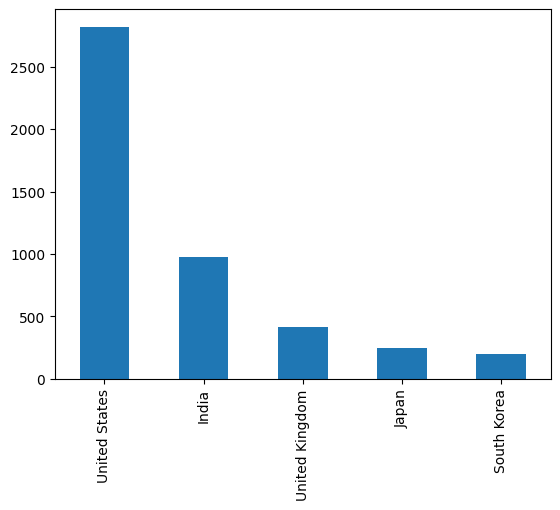

In [189]:
# 5 most common countries for content creation
df['country'].value_counts().head(5).plot(kind='bar')

<AxesSubplot:>

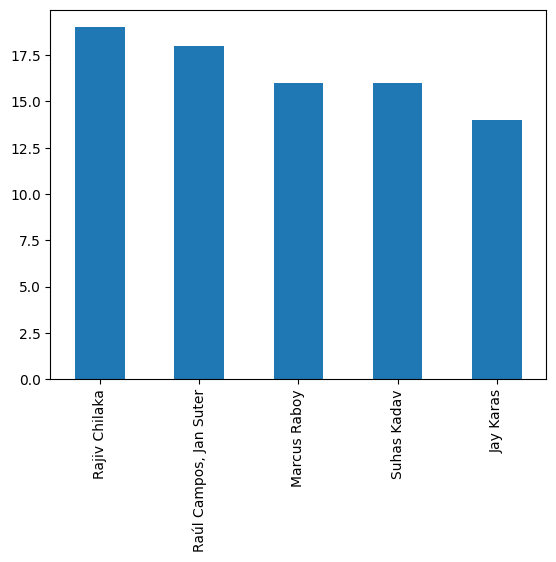

In [190]:
df['director'].value_counts().head(5).plot(kind='bar')

In [191]:
# Save cleaned DF
df.to_csv(path_or_buf = r'C:\Users\Jose\Dropbox\Python\Cambridge Sparks_L4 Data Analytics\Modulo 8 _Hackathon\Netflix Movies and TV Shows_cleaned_Jose.csv')


# load an IMDB dataset 

In [192]:
imdb = pd.read_csv('imdb_top_1000.csv')
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [193]:
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [194]:
# merge the imdb df with the original df on the title column
new_df = df.merge(imdb, left_on='title', right_on='Series_Title', how='left')

In [195]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8808 non-null   object        
 1   type               8808 non-null   object        
 2   title              8808 non-null   object        
 3   director           6174 non-null   object        
 4   cast               7983 non-null   object        
 5   country            7977 non-null   object        
 6   date_added         8798 non-null   datetime64[ns]
 7   release_year       8808 non-null   int64         
 8   rating             8804 non-null   object        
 9   duration           8805 non-null   object        
 10  listed_in          8808 non-null   object        
 11  description        8808 non-null   object        
 12  movie_duration     6129 non-null   float64       
 13  number_of_seasons  2676 non-null   float64       
 14  day_adde

In [196]:
# We just keep row with IMDB rating
df_imdb = new_df.dropna(subset=['IMDB_Rating'])

In [197]:
df_imdb['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [198]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 41 to 8805
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            172 non-null    object        
 1   type               172 non-null    object        
 2   title              172 non-null    object        
 3   director           164 non-null    object        
 4   cast               172 non-null    object        
 5   country            170 non-null    object        
 6   date_added         172 non-null    datetime64[ns]
 7   release_year       172 non-null    int64         
 8   rating             172 non-null    object        
 9   duration           172 non-null    object        
 10  listed_in          172 non-null    object        
 11  description        172 non-null    object        
 12  movie_duration     161 non-null    float64       
 13  number_of_seasons  11 non-null     float64       
 14  day_adde

In [199]:
df_imdb['IMDB_Rating'].describe()

count    172.000000
mean       7.995349
std        0.294156
min        7.600000
25%        7.700000
50%        8.000000
75%        8.200000
max        8.900000
Name: IMDB_Rating, dtype: float64

/kas/kloud/notebook/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


AttributeError: module 'matplotlib' has no attribute 'show'

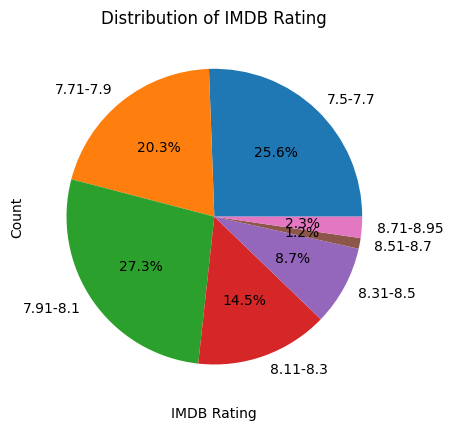

In [200]:

bins = [7.5,7.7,7.9,8.1,8.3,8.5,8.7,8.9]
labels = ['7.5-7.7', '7.71-7.9', '7.91-8.1', '8.11-8.3', '8.31-8.5', '8.51-8.7', '8.71-8.95']


df_imdb['binned'] = pd.cut(df_imdb['IMDB_Rating'], bins=bins, labels=labels)

# Count the occurrences in each group
counts = df_imdb['binned'].value_counts(sort=False)


ax = counts.plot(kind='pie', autopct='%1.1f%%')


ax.set(xlabel='IMDB Rating', ylabel='Count', title='Distribution of IMDB Rating')

# Show the plot
plt.show()

# Now I runthe same code as earlier but on this merge df, to see if we get something different

<AxesSubplot:>

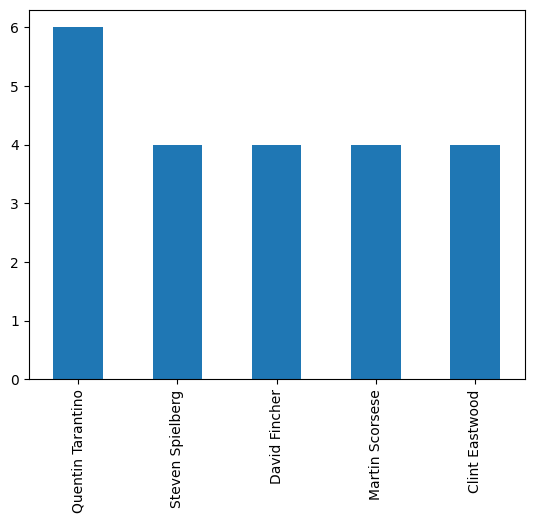

In [201]:
# Most famouos directors on our dataset with high rating on IMDB
df_imdb['director'].value_counts().head(5).plot(kind='bar')

<AxesSubplot:>

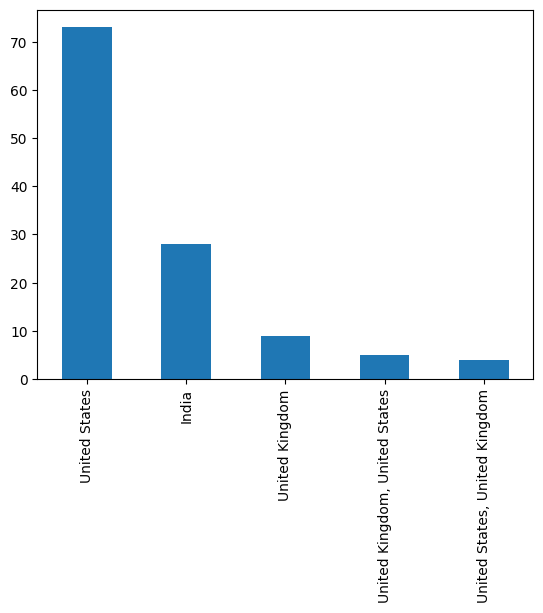

In [202]:
#This code tries to see
df_imdb['country'].value_counts().head(5).plot(kind='bar')

<AxesSubplot:>

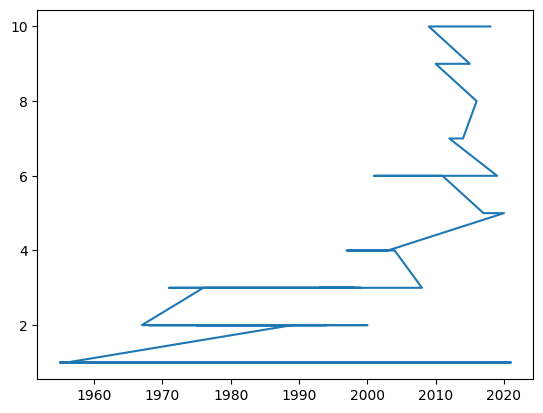

In [203]:
#Not sure whats going on here
df_imdb['release_year'].value_counts().plot()

<AxesSubplot:>

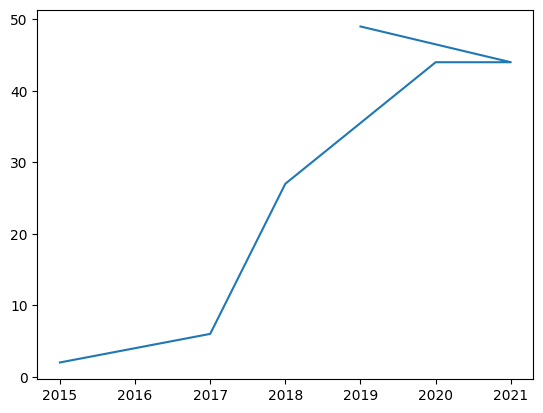

In [204]:
df_imdb['year_added'].value_counts().plot()

<AxesSubplot:title={'center':'Most common rating for the 1000 best rated entries on IMDB'}>

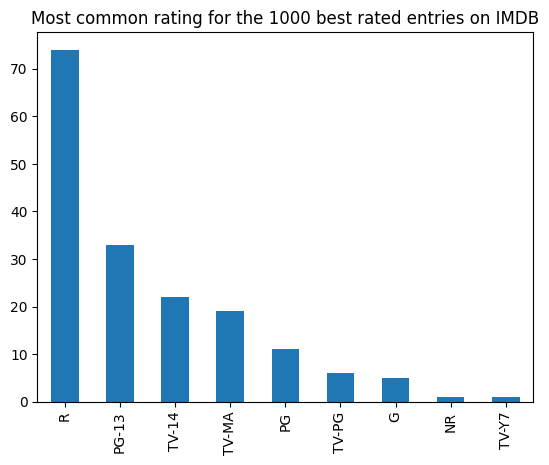

In [205]:
df_imdb['rating'].value_counts().head(12).plot(kind="bar", title="Most common rating for the 1000 best rated entries on IMDB")

# The code below was to join the 2nd df from kaggle and see how many NaN filled but wasn't a success and too many bits of code from different webpages

In [ ]:
df11 = pd.read_csv('netflix_titles.csv')
df22 = pd.read_csv('NetFlix.csv')

In [ ]:
# merge thins on df11 on the title column and add suffix to each column
merged_df = pd.merge(df11, df22, on='title', how='left', suffixes=('_df11', '_df22'))

In [ ]:
#columns we want to compare
columns_to_compare = ['director', 'country', 'date_added', 'rating', 'duration']

In [ ]:
# lopp every column and if it is NAN on df11 but has content on df22, it takes the value from df22 and populates df11
for column in columns_to_compare:
    if column +'_df22' in merged_df.columns:
        df11[column].fillna(merged_df[column + '_df22'], inplace=True)

In [ ]:
#drop the column from df22 as we dont want them
merged_df.drop(columns=[col + '_df22' for col in columns_to_compare], inplace=True)

In [ ]:
df11.info()

In [ ]:
#trying to compare differences between both df. IT DOESNT WORK
df11.compare(df22, align_axis=1)

In [ ]:
#looking at the data on excel found some duplicates
s5967 = df.loc[5966]
s3963 = df.loc[3962]
print(s5967)
print(s3963)

In [ ]:
#drop duplicates
df.drop_duplicates(subset='title', keep='first', inplace=True, ignore_index=True)

In [ ]:
df.isnull().sum()